# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [36]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

# --> Results (Paper vs. Here) are different (no dilation)! #
with the snippet dataset from Robust Time Series Chain Discovery with Incremental Nearest Neighbors (see chains_tilttable.ipynb), the results are the same.

## TiltABP_210_25000 Data (MP VII) ##
The arterial blood pressure (ABP) signal of a patient lying on a tilt table.

m = 180, length of a cardiac cycle (Robust Time Series Chain Discovery with Incremental Nearest Neighbors) --> Results (Paper vs. Here) are different (no dilation)!

m = 200 (MP VII) --> Results (Paper vs. Here) are different (no dilation)!

m = 205 (own testing) --> Results (Paper vs. Here) are the same(?)

In [37]:
# Parameter
use_case = "chains"
data_name = "tilttable"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiments ###

In [38]:
# Hyperparameter
target_w = None
m = 205
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=7) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = False # if True, overlapping chains are filtered
offset = True # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7]


In [39]:
# calculate
calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Running Experiment: target_w=None, m=205, offset=True, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=205, m=205, d=1, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=409, m=205, d=2, offset=25233, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=613, m=205, d=3, offset=25233, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=817, m=205, d=4, offset=25233, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=1021, m=205, d=5, offset=25233, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=1225, m=205, d=6, offset=25233, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=1429, m=205, d=7, offset=25233, groundtruthD1=True, nonoverlapping=False


Visualizing Experiment: target_w=None, m=205, offset=True, groundtruthD1=True, nonoverlapping=False
chain for d=1: [25233 25832 26422 27372 27566 27949 29506 32647 35252]
chain for d=2: [25233]
chain for d=3: [25233]
chain for d=4: [25233]
chain for d=5: [25233 38638]
chain for d=6: [25233]
chain for d=7: [25233]


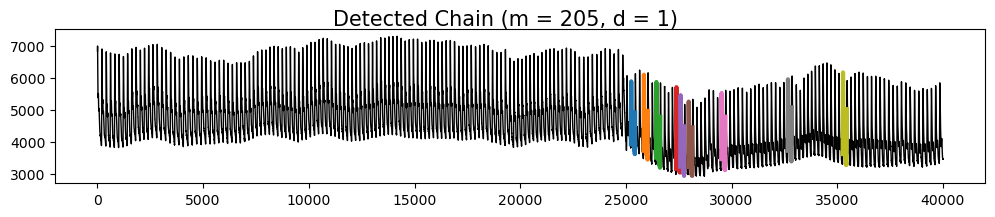

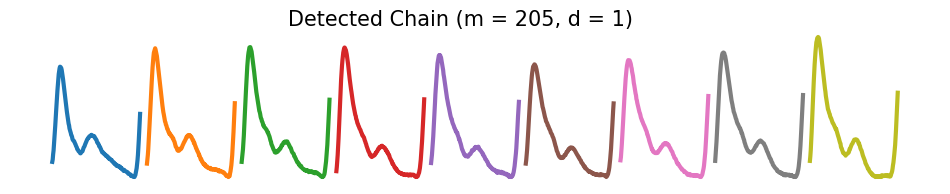

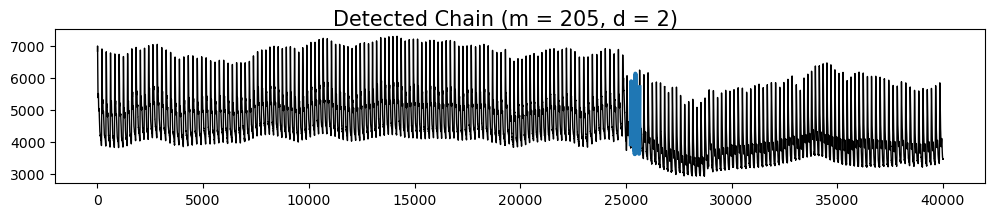

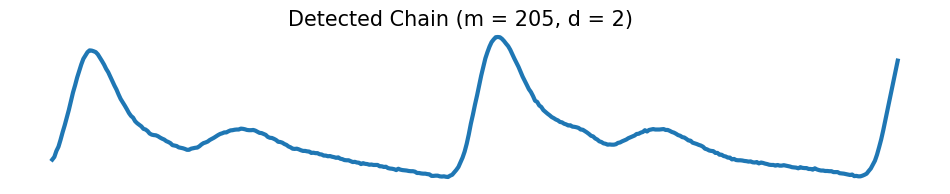

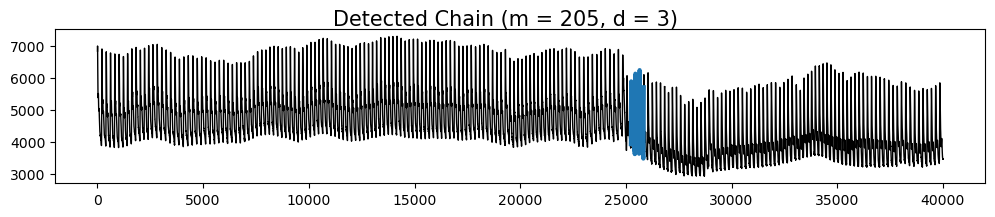

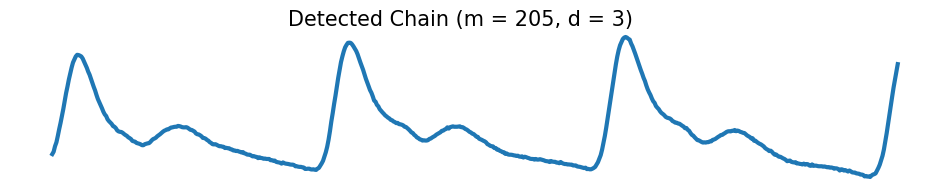

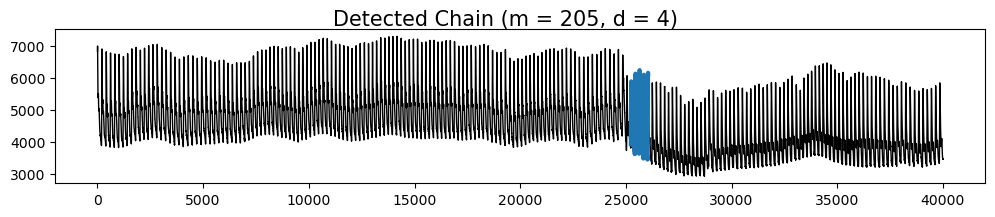

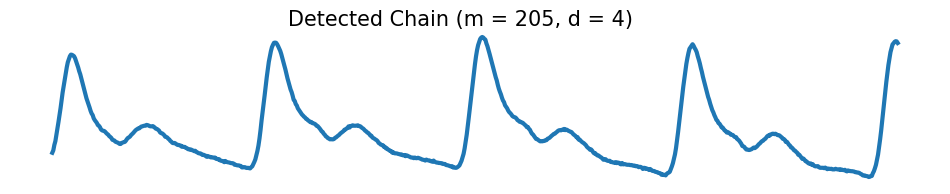

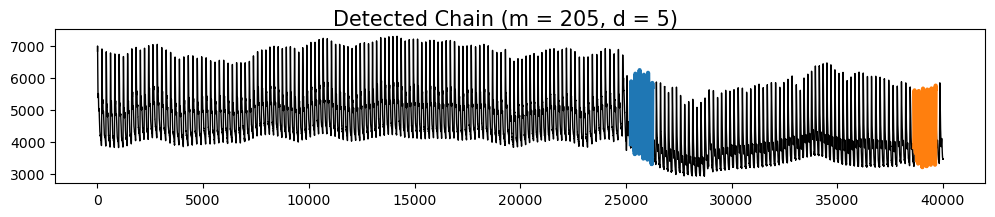

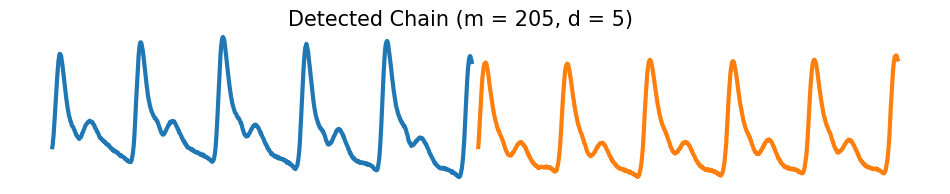

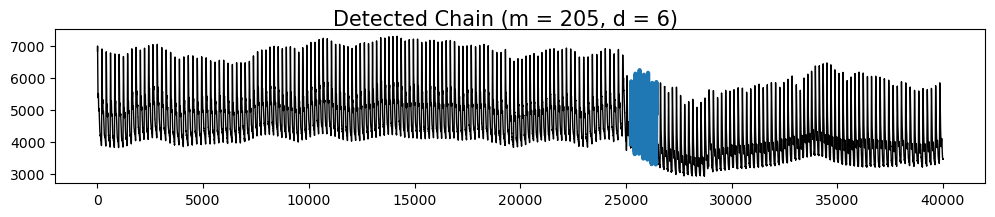

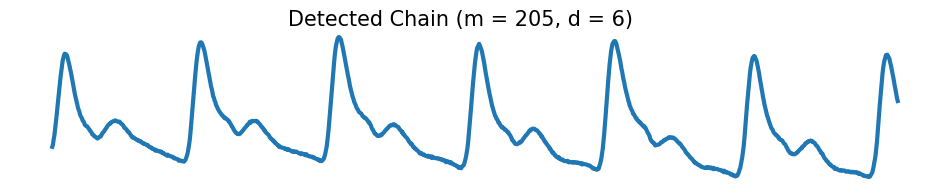

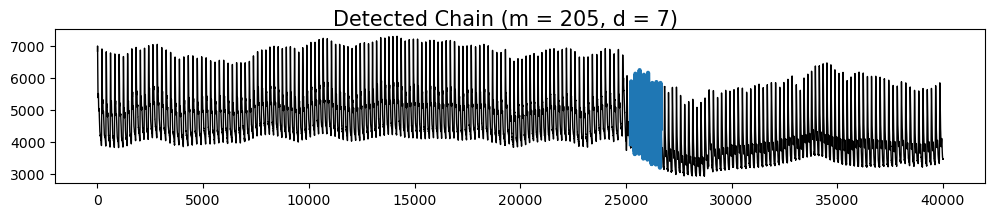

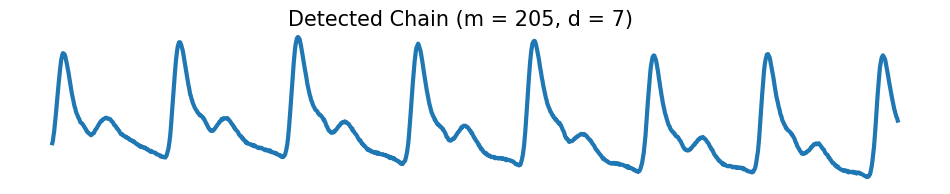

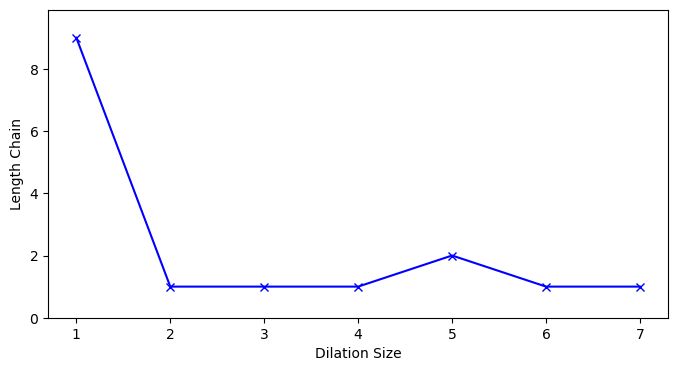

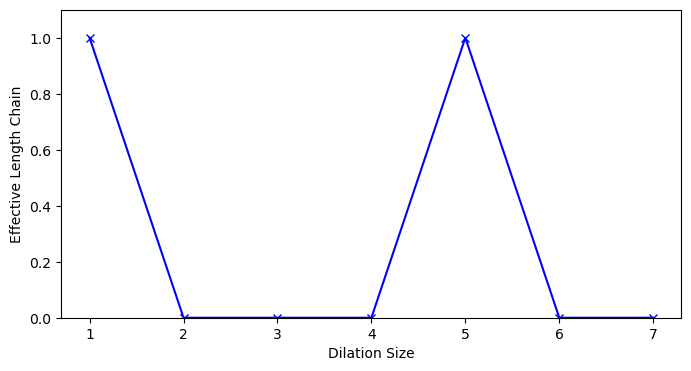

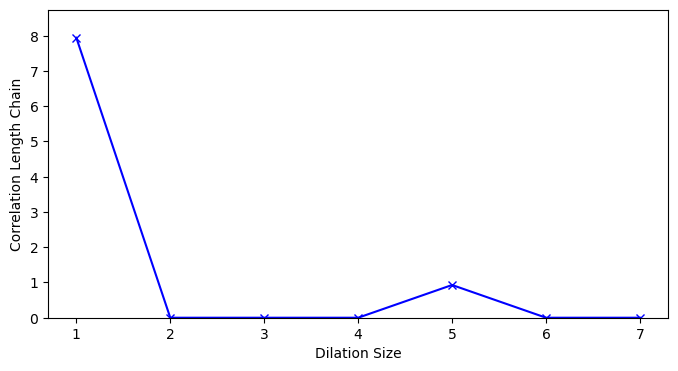

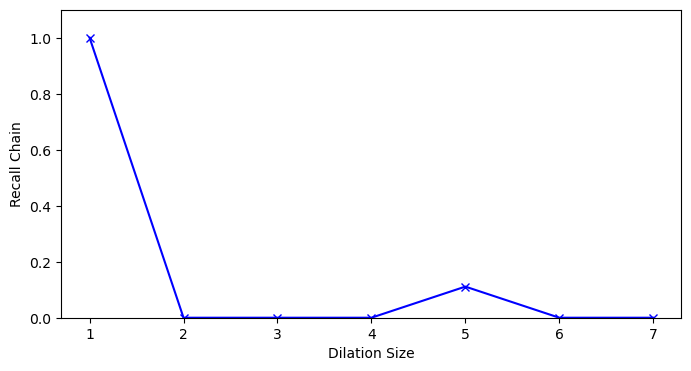

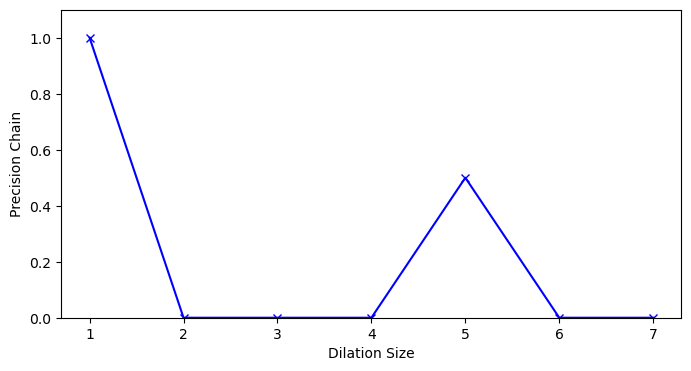

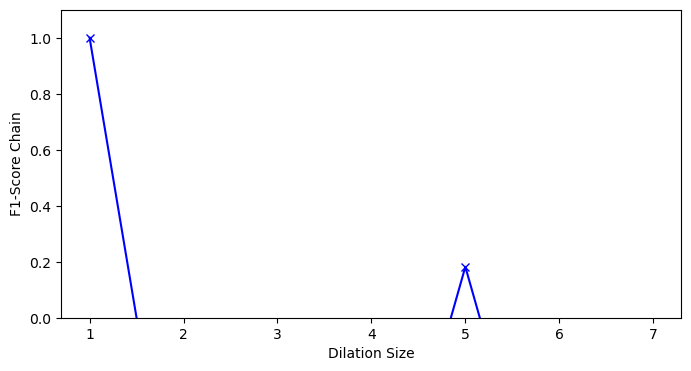

In [40]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)